In [1]:
import datetime
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from dateutil.relativedelta import relativedelta
import seaborn as sns
from wishpy.dataworker import DataWorker
dw = DataWorker(google_secret='../../../wishpy/client_secret.json')
%matplotlib inline

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/wishpy/dataworker.py:83: UserWarning: [Errno 2] No such file or directory: '../../../wishpy/client_secret.json'
  warnings.warn(str(e))


## Data Preparing

In [2]:
df = dw.td_query('''
SELECT delivery_program,
       shipping_country,
       td_time_format(ts_released_from_t,'yyyy-MM-dd','America/Los_Angeles') as release_date,
       ts_wp_order_creation_from_t,
       ts_fm_wp_order_creation_from_w,
       ts_tracking_created_from_t,
       ts_fm_track_created_from_w,
       ts_marked_shipped_from_t,
       ts_confirmed_shipped_from_t,
       ts_fm_carrier_pickup_from_w,
       ts_fm_arrive_first_mile_from_w,
       ts_fm_arrive_epc_warehouse_from_w,
       ts_lm_combine_complete_from_w,
       ts_lm_track_created_from_w,
       ts_lm_depart_epc_warehouse_from_w,
       
       round((ts_tracking_created_from_t - ts_fm_track_created_from_w)/3600.00 , 2) as delta_tracking_created_hr,
       
       round((ts_fm_arrive_epc_warehouse_from_w - ts_released_from_t)/3600.00 , 2)as fm_ttd_hr,
       round((ts_fm_carrier_pickup_from_w - ts_released_from_t)/3600.00 , 2)as fm_release_to_pickup_ttd_hr,
       round((ts_fm_track_created_from_w - ts_released_from_t)/3600.00 , 2)as fm_release_track_ttd_hr,
       round((ts_fm_carrier_pickup_from_w - ts_fm_track_created_from_w)/3600.00 , 2)as fm_track_pickup_ttd_hr,
       round((ts_fm_arrive_epc_warehouse_from_w - ts_fm_carrier_pickup_from_w)/3600.00 , 2)as fm_pickup_warehouse_ttd_hr,
       
       
       round((ts_lm_depart_epc_warehouse_from_w - ts_fm_arrive_epc_warehouse_from_w)/3600.00 , 2) as warehouse_ttd_hr,
       round((ts_lm_track_created_from_w - ts_fm_arrive_epc_warehouse_from_w)/3600.00 , 2) as warehouse_track_ttd_hr,
       round((ts_lm_combine_complete_from_w - ts_lm_track_created_from_w)/3600.00 , 2) as warehouse_track_combine_ttd_hr,
       round((ts_lm_depart_epc_warehouse_from_w - ts_lm_combine_complete_from_w)/3600.00 , 2) as warehouse_combine_depart_ttd_hr
       
from analytics.fm_warehouse_base1
where TD_TIME_RANGE(ts_released_from_t, '2019-11-15 00:00:00', '2020-01-15 00:00:00', 'America/Los_Angeles')
'''
                #,job_id=688354315
                )

You can look at job id 698435602


In [3]:
df.tail(5)
#pd.to_datetime(1578043897,unit='s')

,delivery_program,shipping_country,release_date,ts_wp_order_creation_from_t,ts_fm_wp_order_creation_from_w,ts_tracking_created_from_t,ts_fm_track_created_from_w,ts_marked_shipped_from_t,ts_confirmed_shipped_from_t,ts_fm_carrier_pickup_from_w,...,delta_tracking_created_hr,fm_ttd_hr,fm_release_to_pickup_ttd_hr,fm_release_track_ttd_hr,fm_track_pickup_ttd_hr,fm_pickup_warehouse_ttd_hr,warehouse_ttd_hr,warehouse_track_ttd_hr,warehouse_track_combine_ttd_hr,warehouse_combine_depart_ttd_hr
20960950,None,None,2020-01-09,1.578621e+09,1578621308,1578642532,1578621310,1.578643e+09,1.578676e+09,1.578669e+09,...,5.90,48.79,15.63,2.35,13.28,33.16,105.65,79.69,0.15,25.81
20960951,None,None,2020-01-08,1.578621e+09,1578621310,1578628703,1578621311,1.578629e+09,1.578938e+09,1.578930e+09,...,2.05,170.00,103.77,18.12,85.65,66.23,20.14,0.71,0.02,19.41
20960952,None,None,2020-01-09,1.578621e+09,1578621318,1578622420,1578621319,1.578622e+09,1.578785e+09,1.578779e+09,...,0.31,106.07,48.20,4.50,43.70,57.87,24.36,2.55,0.19,21.62
20960953,None,None,2020-01-09,1.578621e+09,1578621356,1578635326,1578621357,1.578635e+09,1.578660e+09,1.578653e+09,...,3.88,74.26,25.11,16.33,8.77,49.16,21.87,3.17,0.21,18.49
20960954,None,None,2020-01-08,1.578621e+09,1578621368,1578625144,1578621368,1.578625e+09,1.578750e+09,1.578742e+09,...,1.05,96.46,51.87,18.32,33.55,44.60,23.55,1.42,0.03,22.10


## Overview of FM and warehouse TTD distribution

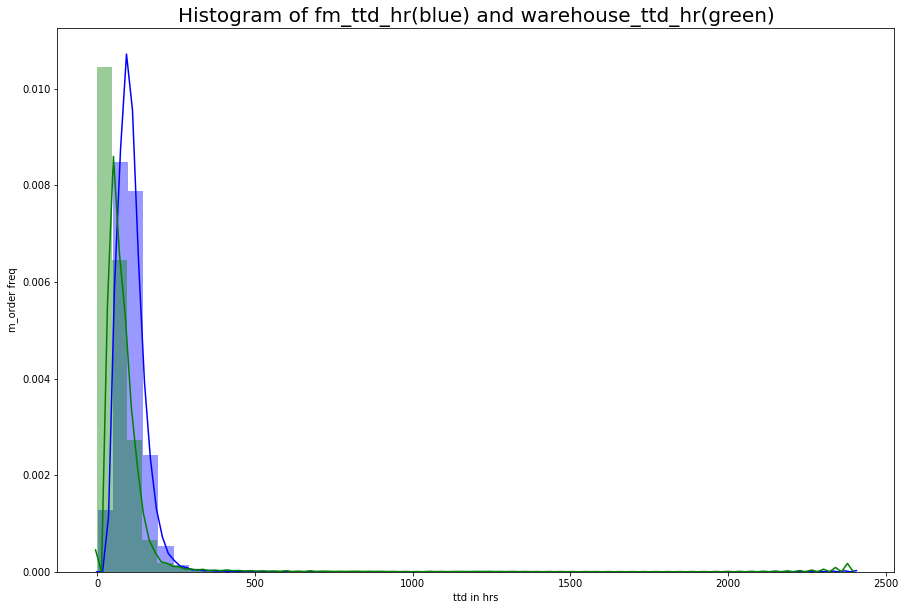

In [4]:
# seaborn histogram
plt.figure(figsize=(15,10))
sns.distplot(df.loc[pd.notnull(df.fm_ttd_hr),'fm_ttd_hr'], 
             hist=True, kde=True, 
             bins=50, color = 'blue')
sns.distplot(df.loc[pd.notnull(df.warehouse_ttd_hr),'warehouse_ttd_hr'], 
             hist=True, kde=True, 
             bins=50, color = 'green')
# adding labels and title
plt.title('Histogram of fm_ttd_hr(blue) and warehouse_ttd_hr(green)',size = 20)
plt.xlabel('ttd in hrs')
plt.ylabel('m_order freq')
plt.show()

## FM and warehouse Breakdown TTD 

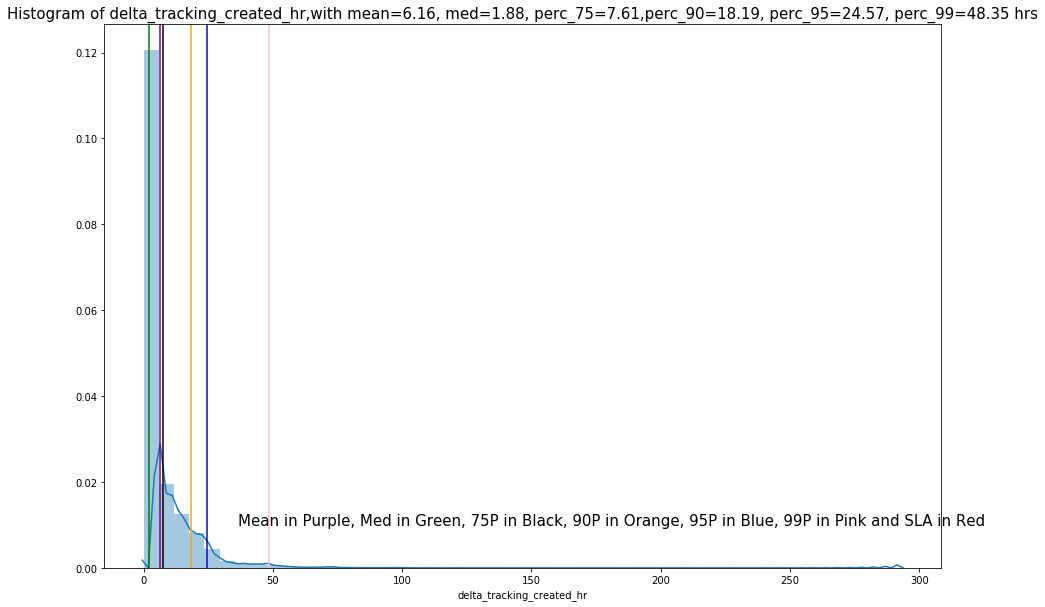

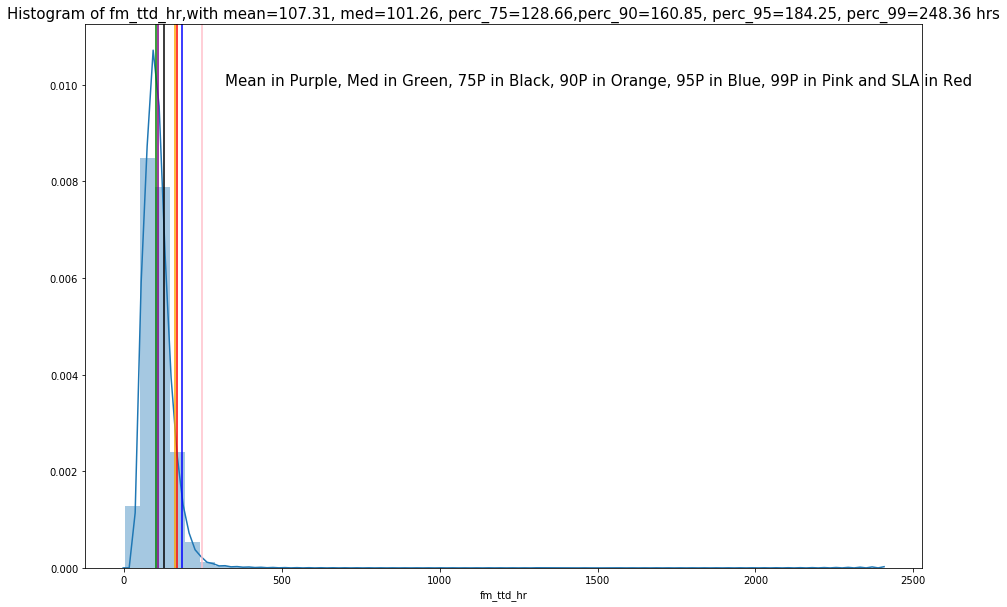

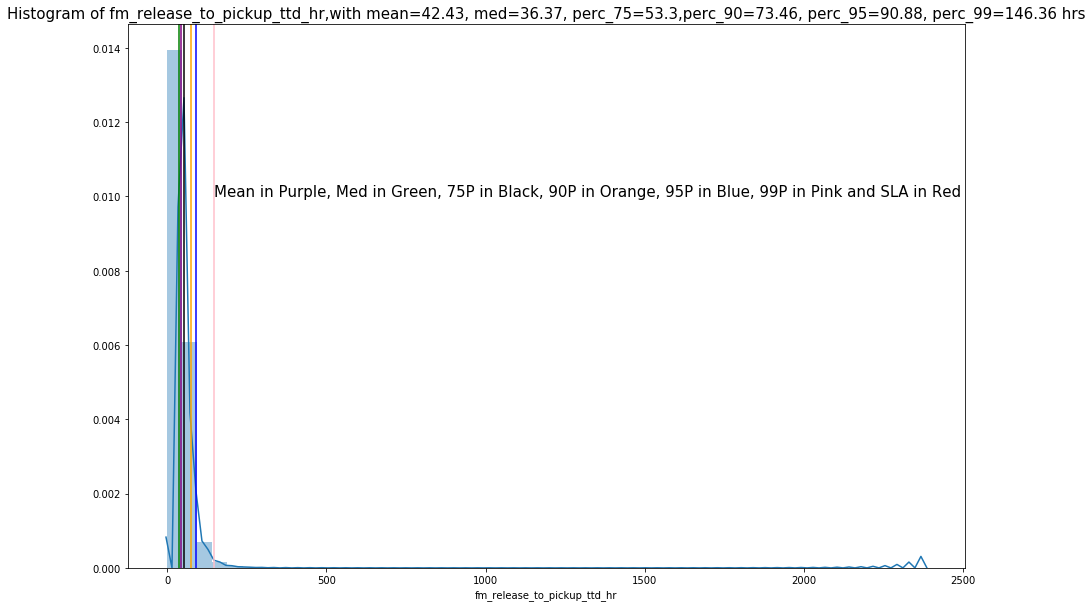

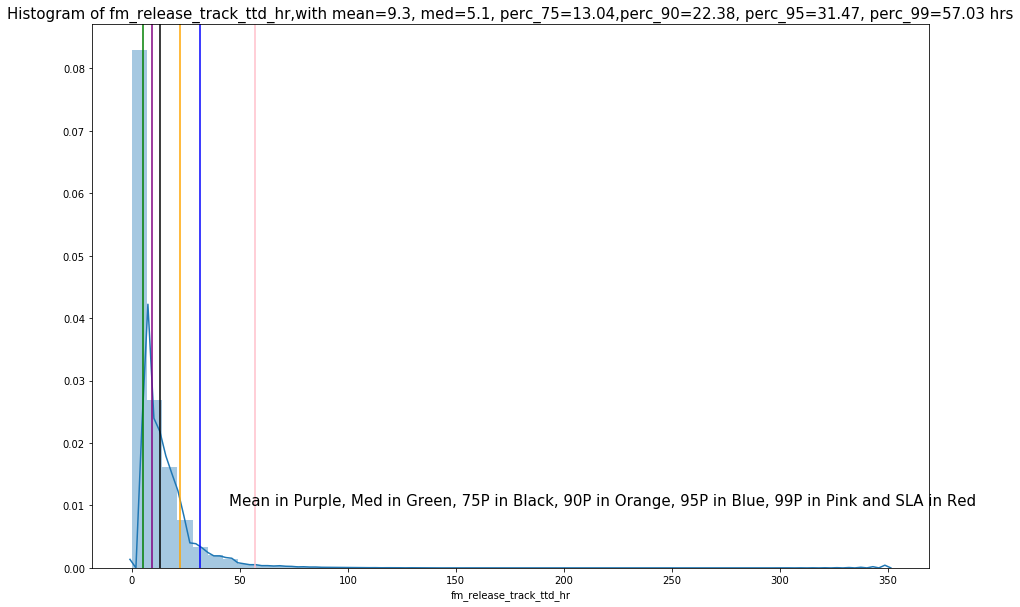

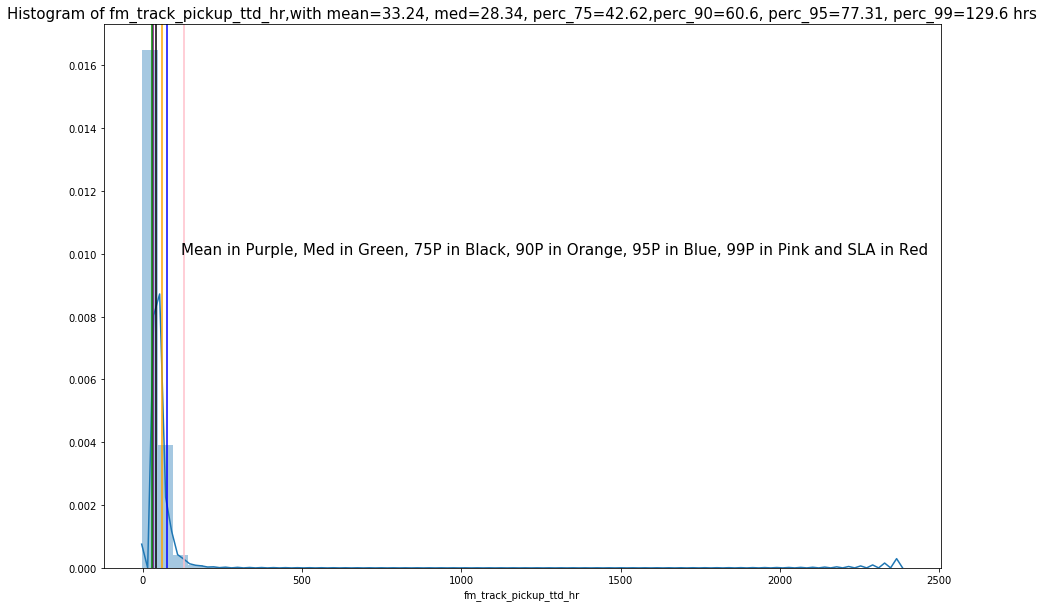

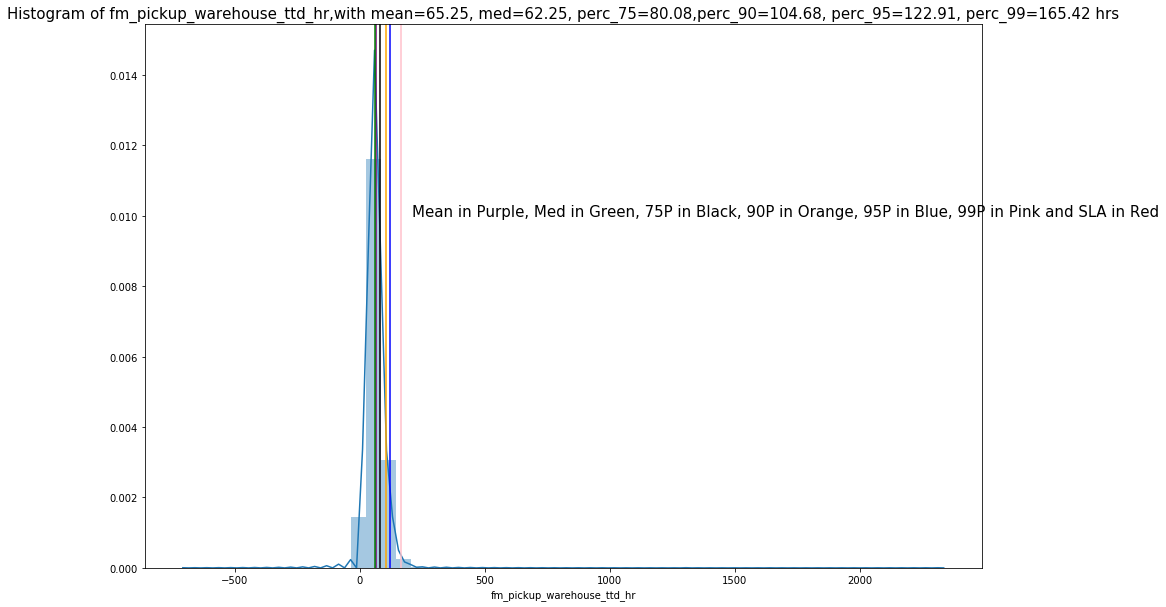

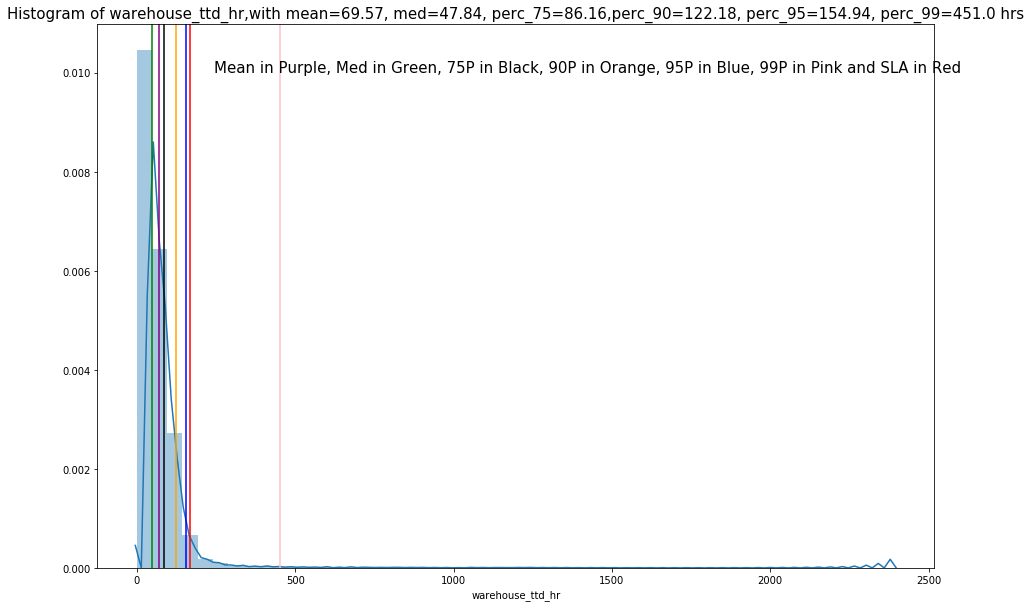

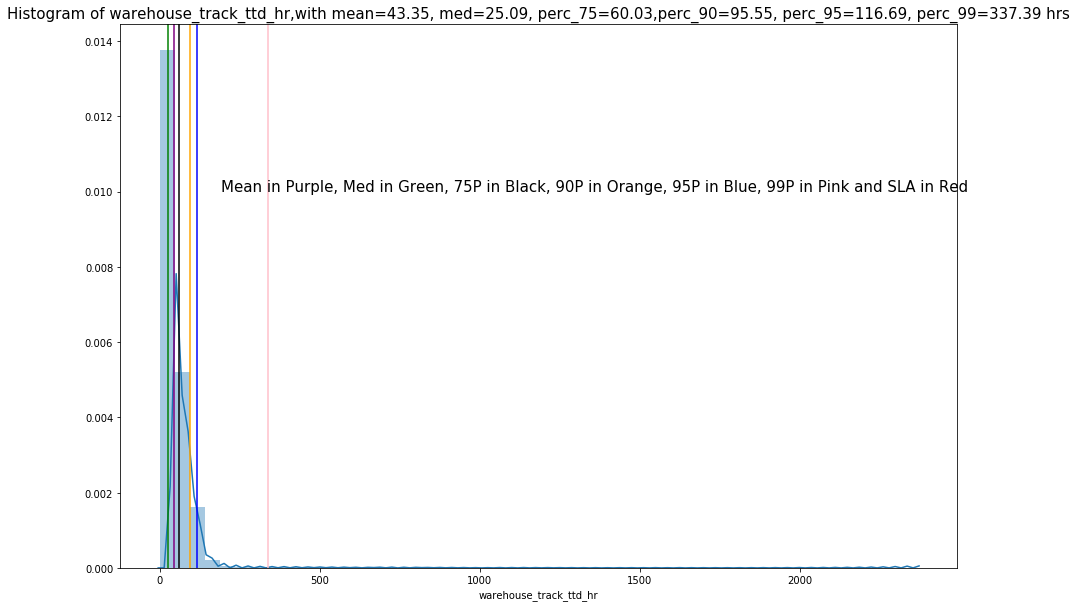

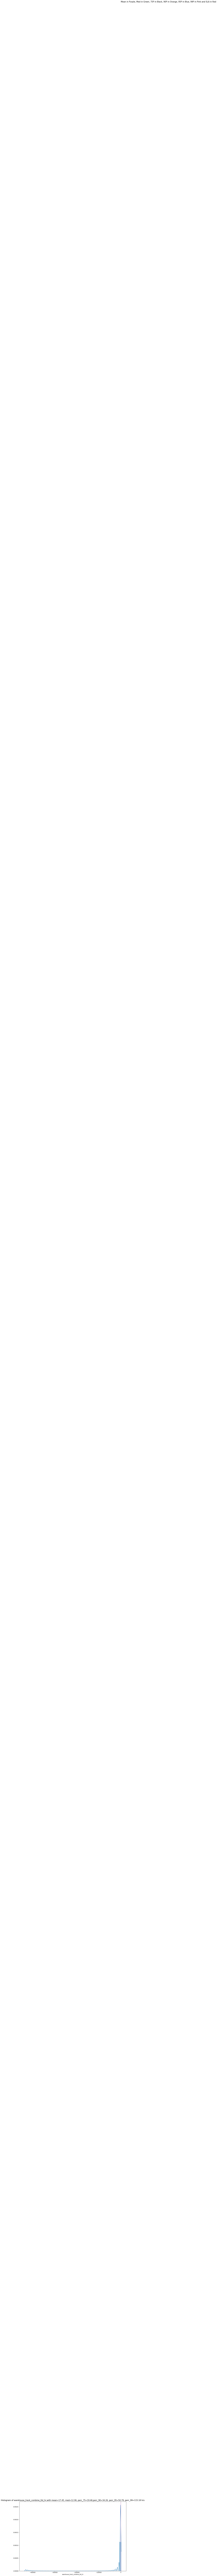

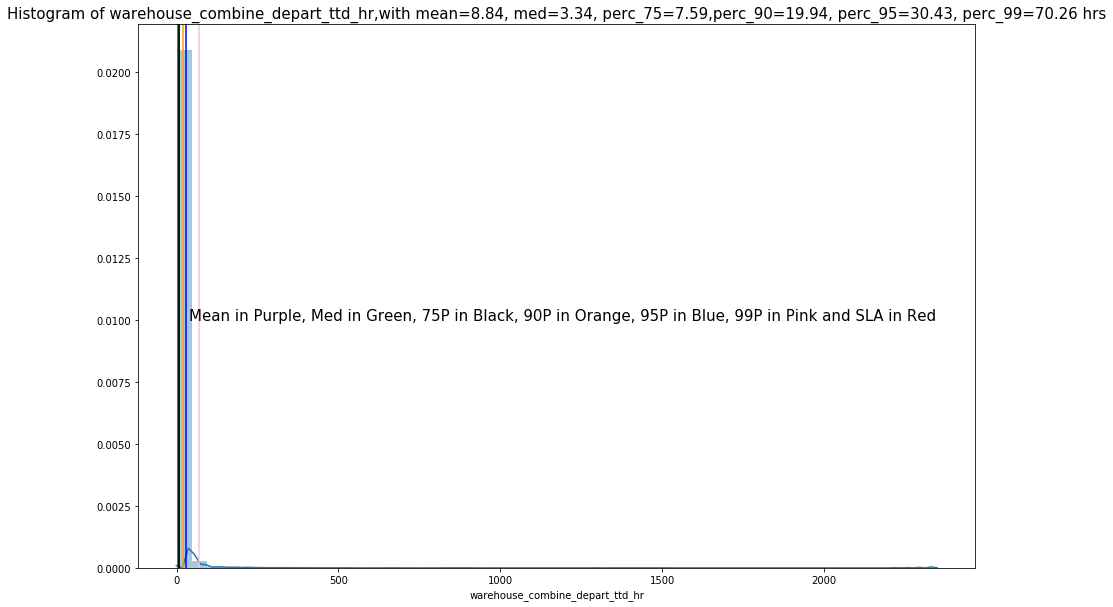

In [5]:
checkpoint_list = ['delta_tracking_created_hr','fm_ttd_hr','fm_release_to_pickup_ttd_hr','fm_release_track_ttd_hr','fm_track_pickup_ttd_hr','fm_pickup_warehouse_ttd_hr',
             'warehouse_ttd_hr','warehouse_track_ttd_hr','warehouse_track_combine_ttd_hr','warehouse_combine_depart_ttd_hr']

for cp in checkpoint_list:
    avg = round(df.loc[df[cp].notnull(),cp].mean(),2)
    perc_50 = round(df.loc[df[cp].notnull(),cp].median(),2)
    perc_75= round(df.loc[df[cp].notnull(),cp].quantile(0.75),2)
    perc_90= round(df.loc[df[cp].notnull(),cp].quantile(0.90),2)
    perc_95= round(df.loc[df[cp].notnull(),cp].quantile(0.95),2)
    perc_99= round(df.loc[df[cp].notnull(),cp].quantile(0.99),2)
    
    plt.figure(figsize=(15,10))
#    sns.set(rc={'figure.figsize':(12,10)})
    sns.distplot(df.loc[df[cp].notnull(),cp], hist=True, kde=True, bins=50)
    
    plt.title('Histogram of %s,with mean=%s, med=%s, perc_75=%s,perc_90=%s, perc_95=%s, perc_99=%s hrs' %(cp,avg,perc_50,perc_75,perc_90,perc_95,perc_99), size = 15)
    plt.axvline(avg, 0, 1, color='purple')
    plt.axvline(perc_50, 0, 1, color='green')
    plt.axvline(perc_75, 0, 1,color='black')
    plt.axvline(perc_90, 0, 1, color='orange')
    plt.axvline(perc_95, 0, 1, color='blue')
    plt.axvline(perc_99, 0, 1, color='pink')
    if cp in ['fm_ttd_hr','warehouse_ttd_hr']:
        plt.axvline(7*24, 0, 1, color='red')
    plt.text(perc_90*2,0.010,'Mean in Purple, Med in Green, 75P in Black, 90P in Orange, 95P in Blue, 99P in Pink and SLA in Red',size=15)
    plt.show()

## Further TTD breakdown by delivery program

In [7]:
checkpoint_list = ['fm_ttd_hr','fm_release_track_ttd_hr','fm_track_pickup_ttd_hr','fm_pickup_warehouse_ttd_hr',
             'warehouse_ttd_hr','warehouse_track_ttd_hr','warehouse_track_combine_ttd_hr','warehouse_combine_depart_ttd_hr']

delivery_list = ['A+','EPC','Fusion']

l = len(checkpoint_list)

----------------------------------------------------------------------------------------------------------------------------------------------------------------
Delivery program is A+
----------------------------------------------------------------------------------------------------------------------------------------------------------------


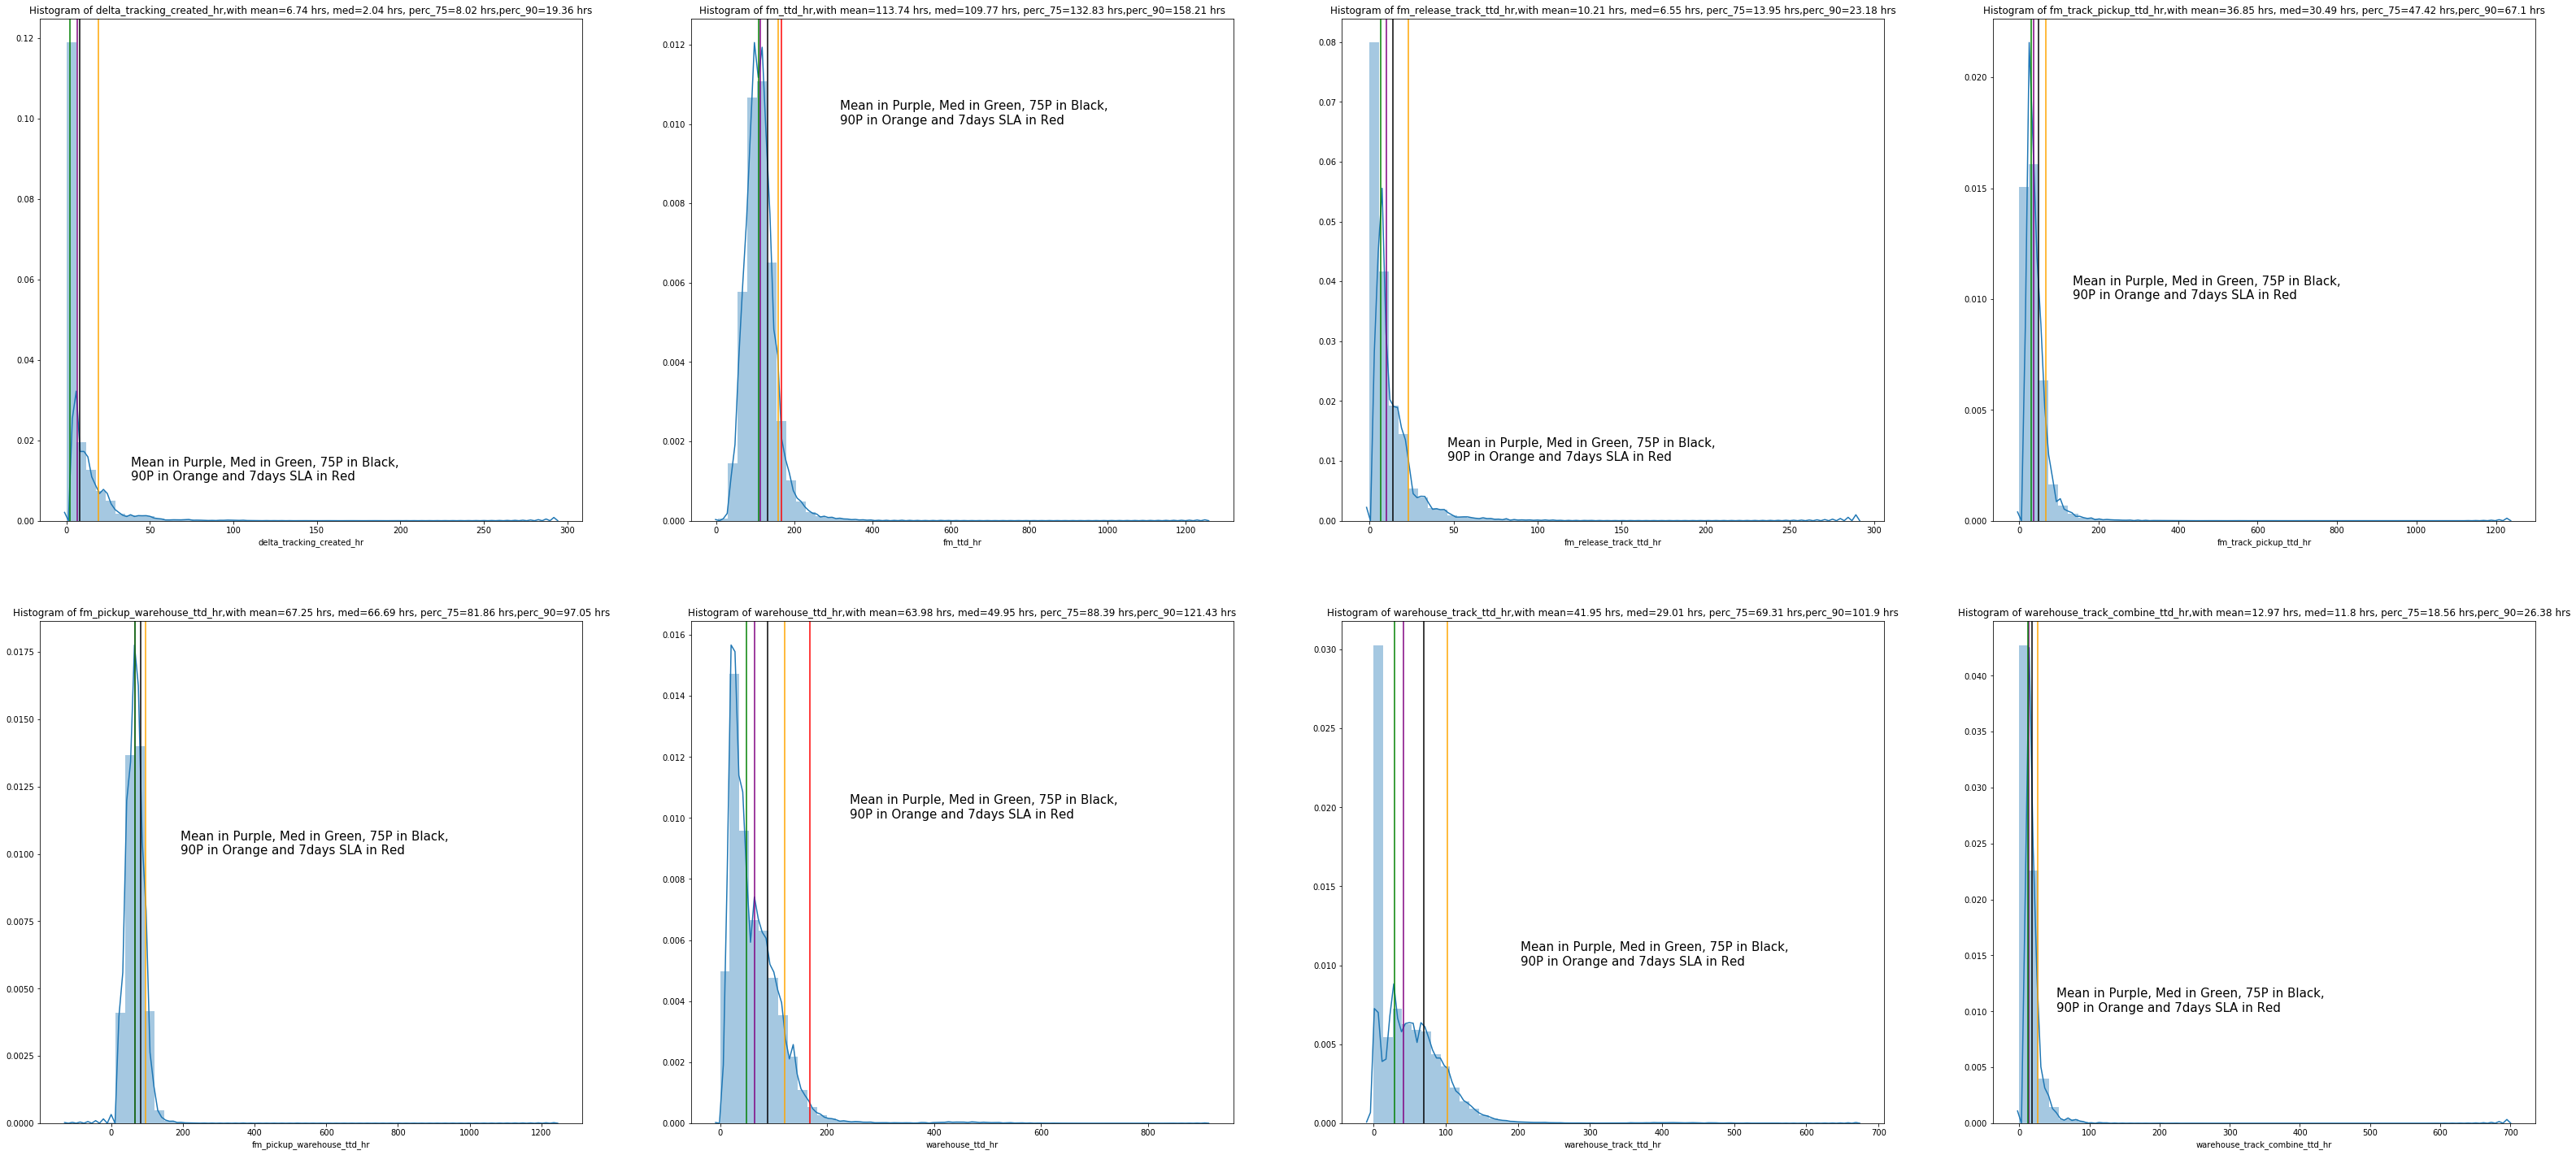

----------------------------------------------------------------------------------------------------------------------------------------------------------------
Delivery program is EPC
----------------------------------------------------------------------------------------------------------------------------------------------------------------


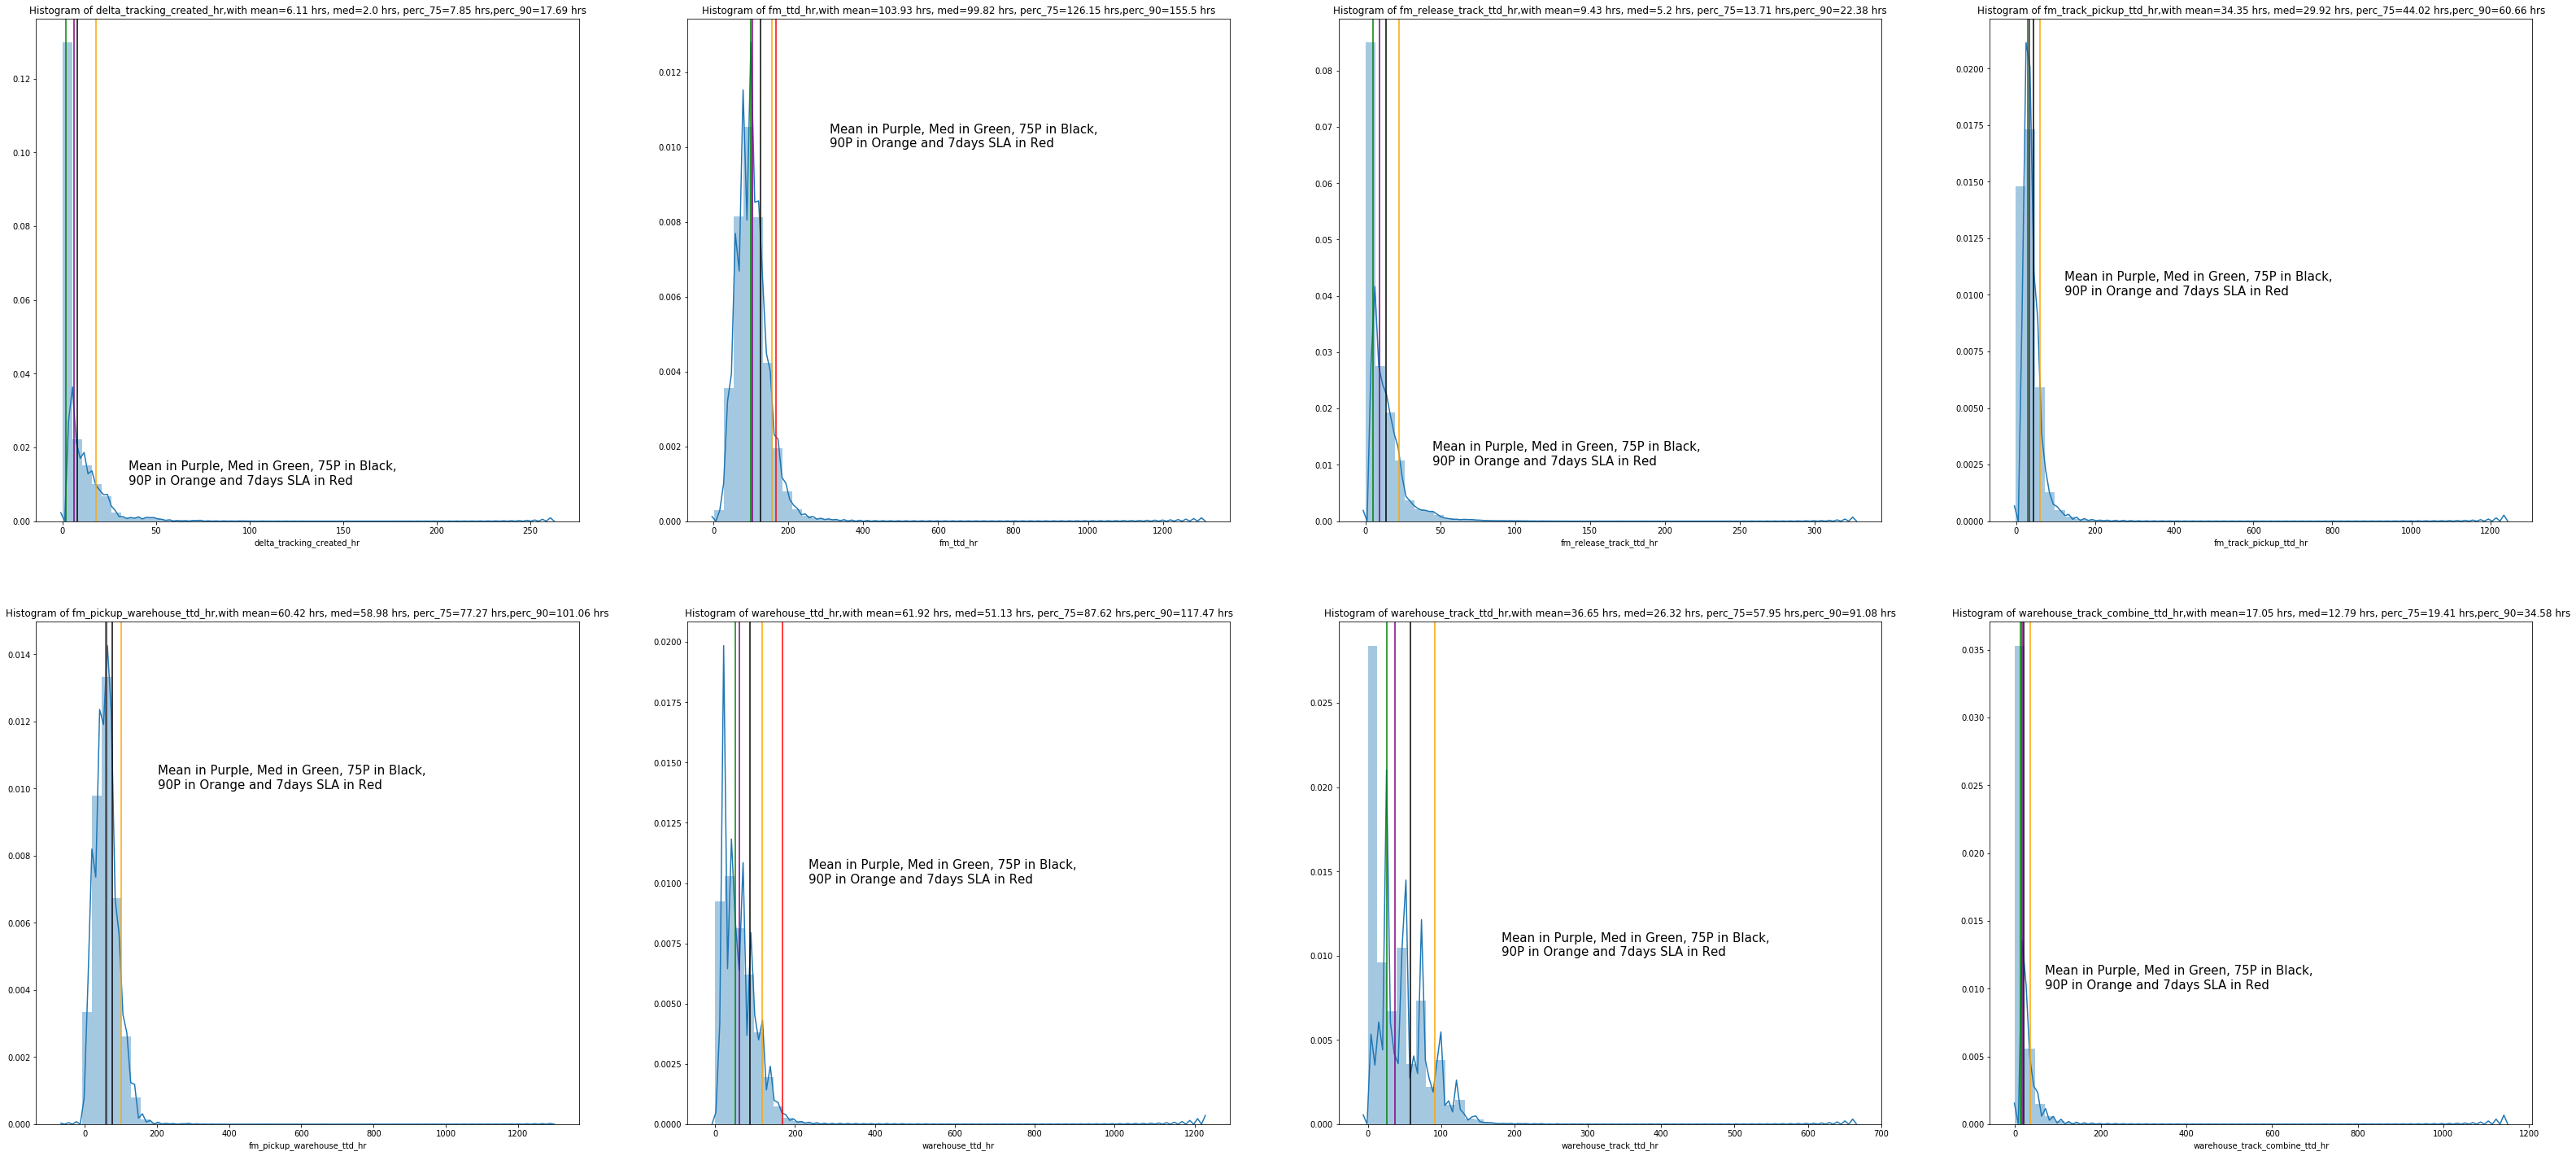

----------------------------------------------------------------------------------------------------------------------------------------------------------------
Delivery program is Fusion
----------------------------------------------------------------------------------------------------------------------------------------------------------------


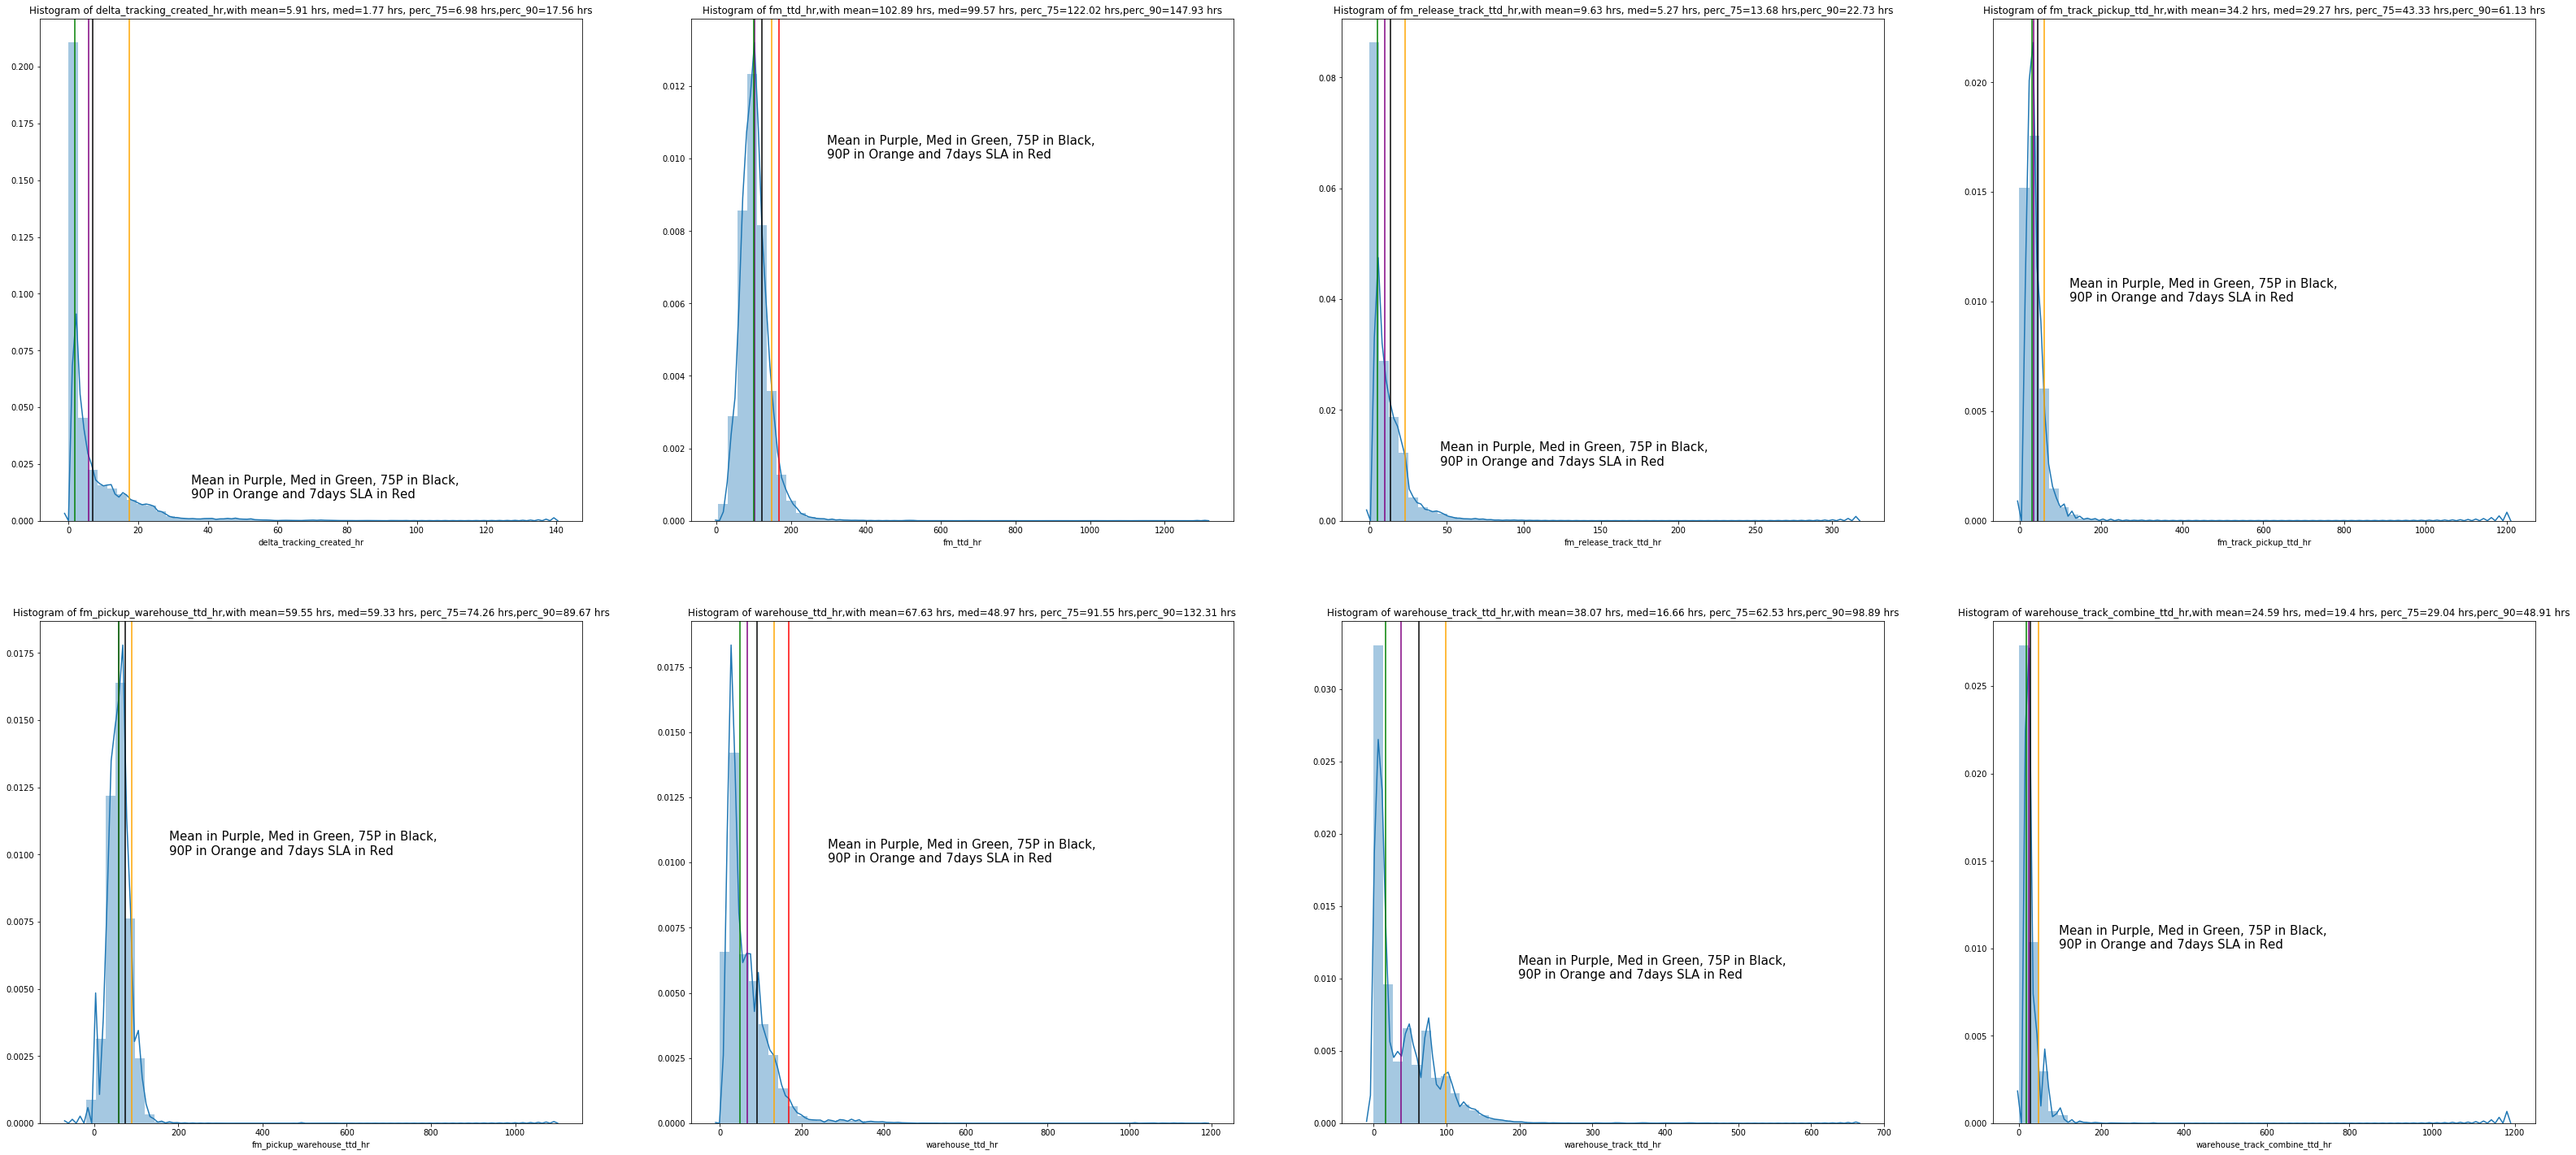

In [20]:

for delivery in delivery_list:
    print('-'*160)
    print('Delivery program is %s' %(delivery))
    print('-'*160)
    fig, axes = plt.subplots(2,4, figsize=(55,25))
    
    for i in range(l):
        m = int(i / 4)
        n = int(i % 4)
        
        mask1 = (df['delivery_program'] == delivery)
        mask2 = (df[checkpoint_list[i]].notnull())
        
        avg = round(df.loc[mask1 & mask2 , checkpoint_list[i]].mean(),2)
        perc_50 = round(df.loc[mask1 & mask2,checkpoint_list[i]].median(),2)
        perc_75= round(df.loc[mask1 & mask2,checkpoint_list[i]].quantile(0.75),2)
        perc_90= round(df.loc[mask1 & mask2,checkpoint_list[i]].quantile(0.9),2)
        
        sns.distplot(df.loc[mask1 & mask2,checkpoint_list[i]], hist=True, kde=True, bins=50, ax=axes[m, n])
        
        axes[m, n].title.set_text('Histogram of %s,with mean=%s hrs, med=%s hrs, perc_75=%s hrs,perc_90=%s hrs' %(checkpoint_list[i],avg,perc_50,perc_75,perc_90))
        axes[m, n].axvline(avg, 0, 1, color='purple')
        axes[m, n].axvline(perc_50, 0, 1, color='green')
        axes[m, n].axvline(perc_75, 0, 1,color='black')
        axes[m, n].axvline(perc_90, 0, 1, color='orange')
        if checkpoint_list[i] in ['fm_ttd_hr','warehouse_ttd_hr']:
            axes[m, n].axvline(7*24, 0, 1, color='red')
        axes[m, n].text(perc_90*2,0.010, 'Mean in Purple, Med in Green, 75P in Black, \n90P in Orange and 7days SLA in Red',size=15)
        
    plt.show()